<!-- Header Section with Custom Styles -->
<h1 style="color: #4CAF50; font-family: Arial, sans-serif; font-size: 36px; text-align: center;">Machine Learning Assignment # 3</h1>
<h2 style="color: #FF5733; font-family: 'Georgia', serif; font-size: 28px; text-align: center;">Name: Khizar Ali</h2>
<h3 style="color: #009688; font-family: 'Courier New', Courier, monospace; font-size: 24px; text-align: center;">Roll No: 22P-9269</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

<h2 style="color: #673AB7; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Creating Linear Dataset
</h2>


In [2]:
def generate_linear_house_data(n_samples=100, random_state=42):
    np.random.seed(random_state)
    
    # Features
    size = np.random.uniform(500, 3500, n_samples)        # Size in square feet
    bedrooms = np.random.randint(1, 6, n_samples)        # Number of bedrooms
    bathrooms = np.random.randint(1, 4, n_samples)       # Number of bathrooms (Added attribute)
    
    # Coefficients
    coef_size = 300      # Price increases by $300 per square foot
    coef_bedrooms = 5000 # Price increases by $5,000 per bedroom
    coef_bathrooms = 7000# Price increases by $7,000 per bathroom
    intercept = 50000    # Base price
    
    # Target with some noise
    noise = np.random.normal(0, 10000, n_samples)
    price = intercept + (coef_size * size) + (coef_bedrooms * bedrooms) + (coef_bathrooms * bathrooms) + noise
    
    # Create DataFrame
    linear_df = pd.DataFrame({
        'Size_SqFt': size,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'Price': price
    })
    
    return linear_df

In [3]:
def plot_linear_dataset(df):
    plt.figure(figsize=(18, 5))
    
    # Size vs Price
    plt.subplot(1, 3, 1)
    plt.scatter(df['Size_SqFt'], df['Price'], color='blue', alpha=0.6)
    plt.title('Price vs Size (Linear)')
    plt.xlabel('Size (Sq Ft)')
    plt.ylabel('Price ($)')
    
    # Bedrooms vs Price
    plt.subplot(1, 3, 2)
    plt.scatter(df['Bedrooms'], df['Price'], color='green', alpha=0.6)
    plt.title('Price vs Bedrooms (Linear)')
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Price ($)')
    
    # Bathrooms vs Price
    plt.subplot(1, 3, 3)
    plt.scatter(df['Bathrooms'], df['Price'], color='orange', alpha=0.6)
    plt.title('Price vs Bathrooms (Linear)')
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Price ($)')
    
    plt.tight_layout()
    plt.show()

<h2 style="color: #E91E63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Creating Non-Linear Dataset
</h2>


In [4]:
def generate_nonlinear_house_data(n_samples=100, random_state=42):
    np.random.seed(random_state)
    
    # Features
    size = np.random.uniform(500, 3500, n_samples)             # Size in square feet
    location_index = np.random.uniform(1, 10, n_samples)       # Location desirability index
    age_of_house = np.random.randint(0, 100, n_samples)       # Age of the house in years (Added attribute)
    
    # Nonlinear relationship coefficients
    intercept = 30000
    coef_size = 2000         # Price increases by $200 per square foot
    coef_location = 1000   # Base effect of location index
    coef_location_sq = 5000 # Additional effect for higher location index (nonlinear)
    coef_age = -30         # Price decreases by $300 per year of age
    coef_age_sq = 1000        # Small nonlinear effect of age
    
    # Target with nonlinear relationship and some noise
    noise = np.random.normal(100, 150000, n_samples)
    price = (intercept + 
             (coef_size * size) + 
             (coef_location * location_index) + 
             (coef_location_sq * (location_index ** 2)) + 
             (coef_age * age_of_house) +
             (coef_age_sq * (age_of_house ** 2)) +
             noise)
    
    # Create DataFrame
    nonlinear_df = pd.DataFrame({
        'Size_SqFt': size,
        'Location_Index': location_index,
        'Age_of_House': age_of_house,
        'Price': price
    })
    
    return nonlinear_df

In [5]:
def plot_nonlinear_dataset(df):
    plt.figure(figsize=(18, 5))
    
    # Size vs Price
    plt.subplot(1, 3, 1)
    plt.scatter(df['Size_SqFt'], df['Price'], color='red', alpha=0.6)
    plt.title('Price vs Size (Nonlinear)')
    plt.xlabel('Size (Sq Ft)')
    plt.ylabel('Price ($)')
    
    # Location Index vs Price
    plt.subplot(1, 3, 2)
    plt.scatter(df['Location_Index'], df['Price'], color='purple', alpha=0.6)
    plt.title('Price vs Location Index (Nonlinear)')
    plt.xlabel('Location Index')
    plt.ylabel('Price ($)')
    
    # Age of House vs Price
    plt.subplot(1, 3, 3)
    plt.scatter(df['Age_of_House'], df['Price'], color='brown', alpha=0.6)
    plt.title('Price vs Age of House (Nonlinear)')
    plt.xlabel('Age of House (Years)')
    plt.ylabel('Price ($)')
    
    plt.tight_layout()
    plt.show()

In [6]:
def save_datasets_to_csv(linear_df, nonlinear_df, linear_filename='linear_house_prices.csv', nonlinear_filename='nonlinear_house_prices.csv'):
    linear_df.to_csv(linear_filename, index=False)
    nonlinear_df.to_csv(nonlinear_filename, index=False)
    print(f"Datasets saved to '{linear_filename}' and '{nonlinear_filename}' successfully.")

<h2 style="color: #673AB7; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
   Linear Dataset
</h2>


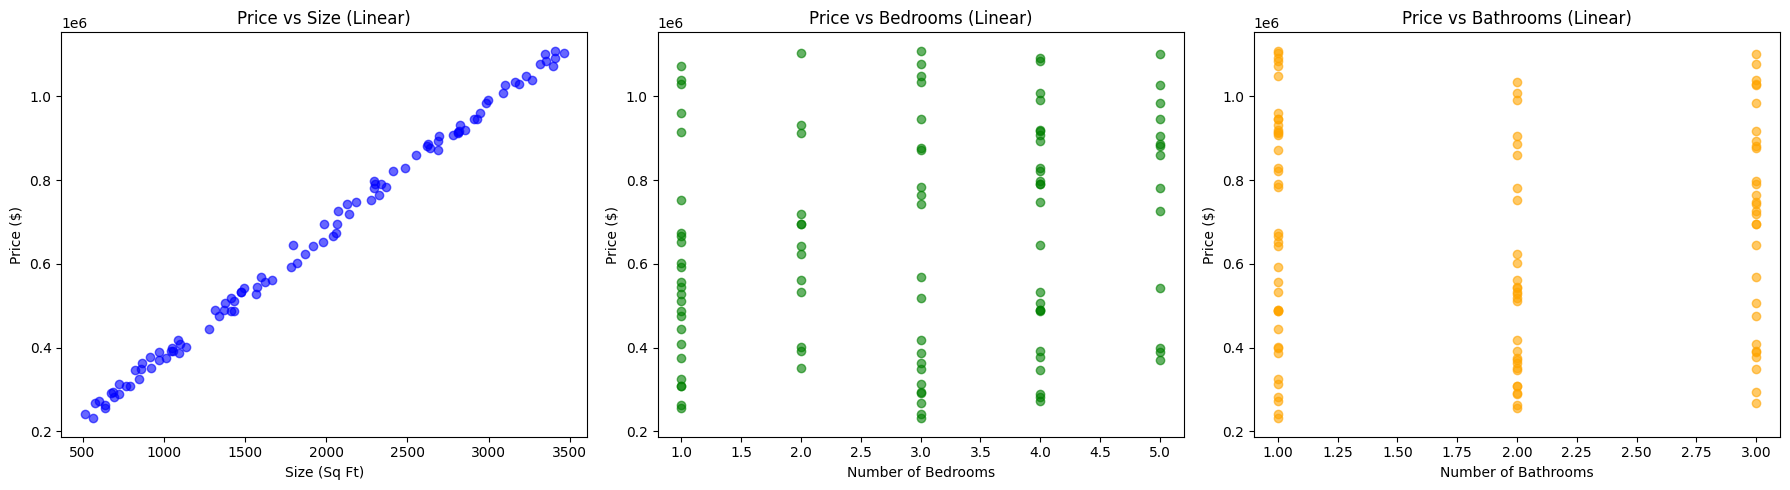

In [7]:
linear_house_df = generate_linear_house_data()
plot_linear_dataset(linear_house_df)

<h2 style="color: #E91E63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
 Non-Linear Dataset
</h2>


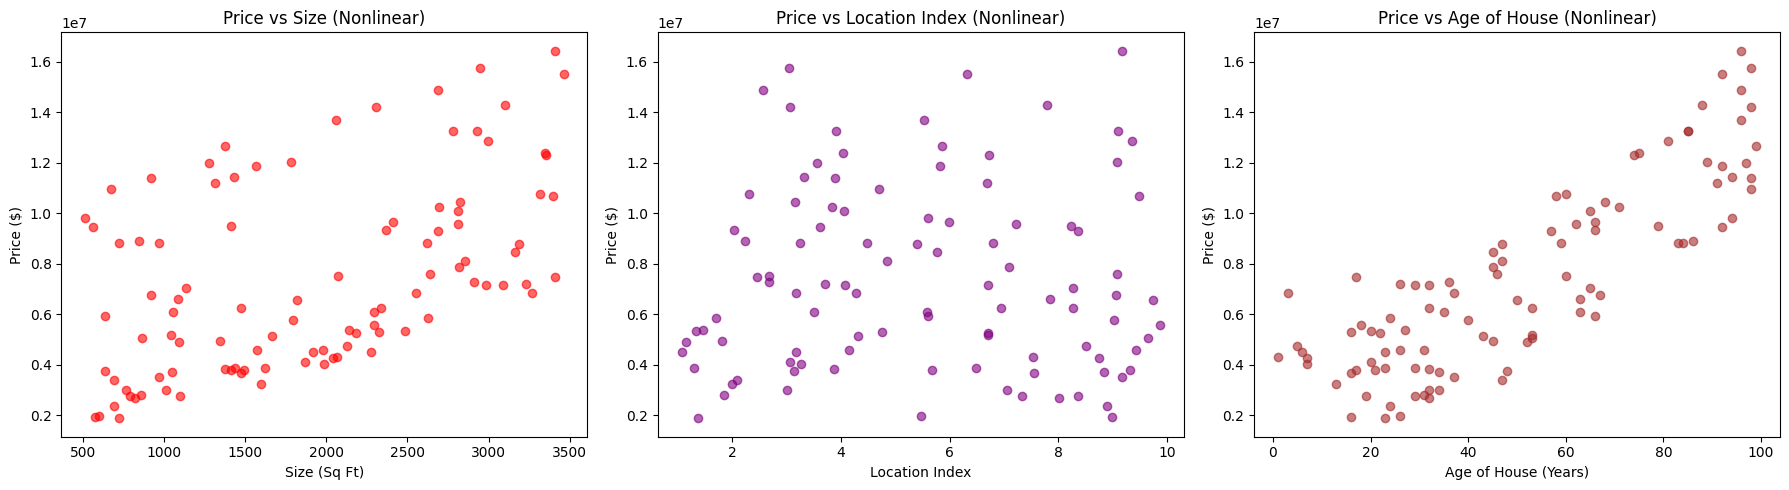

In [8]:
nonlinear_house_df = generate_nonlinear_house_data()
plot_nonlinear_dataset(nonlinear_house_df)

In [9]:
save_datasets_to_csv(linear_house_df, nonlinear_house_df)

Datasets saved to 'linear_house_prices.csv' and 'nonlinear_house_prices.csv' successfully.


In [10]:
linear=pd.read_csv('linear_house_prices.csv')
linear.head()

,Size_SqFt,Bedrooms,Bathrooms,Price
0,1623.620357,1,1,5.561872e+05
1,3352.142919,4,1,1.083568e+06
2,2695.981825,5,2,9.040953e+05
3,2295.975453,4,3,7.974220e+05
4,968.055921,5,3,3.887263e+05


In [11]:
non_linear=pd.read_csv('nonlinear_house_prices.csv')
non_linear.head()

,Size_SqFt,Location_Index,Age_of_House,Price
0,1623.620357,1.282863,23,3.877958e+06
1,3352.142919,6.727694,74,1.233198e+07
2,2695.981825,3.829204,71,1.026779e+07
3,2295.975453,5.577136,35,6.077258e+06
4,968.055921,9.168098,37,3.530825e+06


In [12]:
def pre_processing(df):
    scaler = StandardScaler()
    
    scaled = scaler.fit_transform(df)
    
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    
    return scaled_df


<h2 style="color: #2196F3; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Linear Regression
</h2>


In [13]:
def linear_regressor(df,data):
    linear1=pre_processing(df)
    X = linear1.drop('Price',axis=1)
    y = linear1['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    print(f"Linear Regression MSE on {data} Dataset: {mse:.2f}")
    print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')
    # Plot the regression line (for Size_SqFt vs Price as an example)
    plt.scatter(X_test['Size_SqFt'], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test['Size_SqFt'], y_pred, color='red', label='Predicted Price', alpha=0.5)
    plt.xlabel('Size (SqFt)')
    plt.ylabel('Price')
    plt.title('Linear Regression: Size vs Price')
    plt.legend()
    plt.show()

<h2 style="color: #673AB7; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Linear Regression  on Linear dataset
</h2>


Linear Regression MSE on Linear Dataset: 0.00
Train Accuracy - : 0.999
Test Accuracy - : 0.999


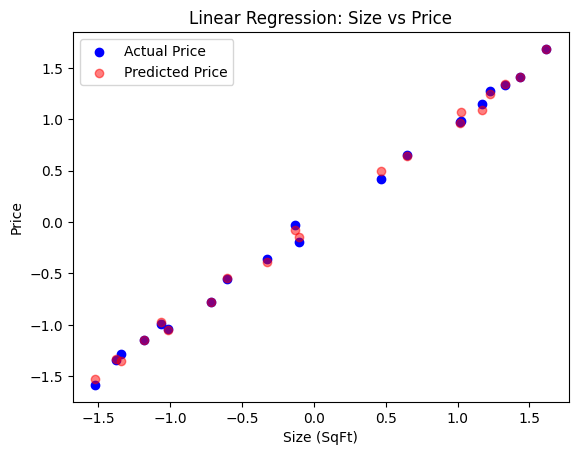

In [14]:
linear_regressor(linear,'Linear')

<h2 style="color: #E91E63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Linear Regression on Non-linear Dataset
</h2>


Linear Regression MSE on non Linear Dataset: 0.04
Train Accuracy - : 0.959
Test Accuracy - : 0.965


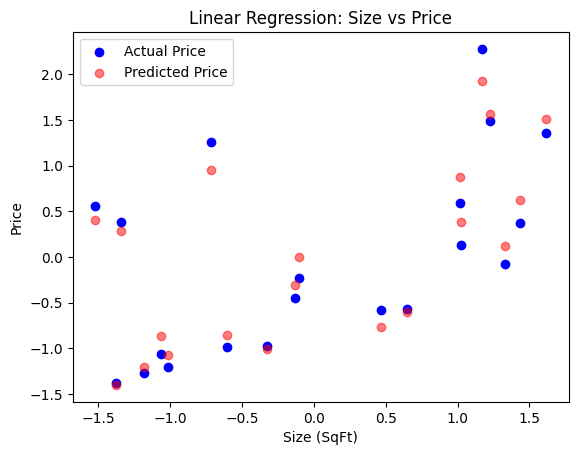

In [15]:
linear_regressor(non_linear,"non Linear")

<h2 style="color: #FF5722; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    K-Nearest Neighbors (KNN)
</h2>


In [16]:
def knn_regressor(df, data):
    linear1 = pre_processing(df)
    X = linear1.drop('Price',axis=1)
    y = linear1['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = KNeighborsRegressor()

    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11], 
        'weights': ['uniform', 'distance'],  
        'p': [1, 2]  
    }
    # print(X_train.count())
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1, n_jobs = 5)
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    # Evaluate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Best KNN Model MSE on {data} Dataset: {mse:.2f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print (f'Train Accuracy - : {best_model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {best_model.score(X_test,y_test):.3f}')
    # Plotting the predictions
    plt.scatter(X_test['Size_SqFt'], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test['Size_SqFt'], y_pred, color='red', label='Predicted Price', alpha=0.5)
    plt.xlabel('Size (SqFt)')
    plt.ylabel('Price')
    plt.title(f'KNN Regression (Best Model): Size vs Price')
    plt.legend()
    plt.show()


<h2 style="color: #673AB7; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    K-Nearest Neighbors On linear Dataset
</h2>


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Model MSE on Linear Dataset: 0.04
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Train Accuracy - : 1.000
Test Accuracy - : 0.961


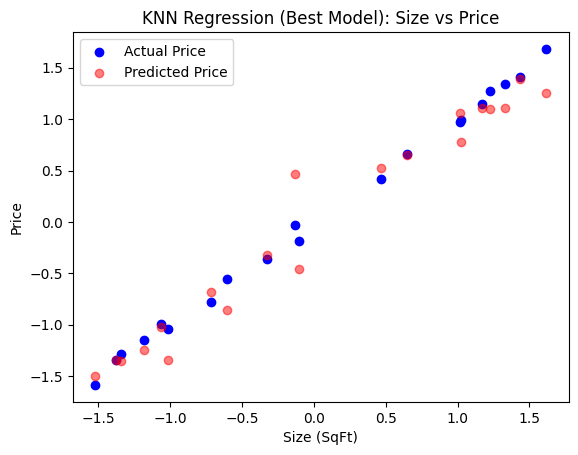

In [17]:
knn_regressor(linear,'Linear')

<h2 style="color: #E91E63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    K-Nearest Neighbors (KNN) on Non-linear Dataset
</h2>


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Model MSE on Non_Linear Dataset: 0.05
Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Train Accuracy - : 1.000
Test Accuracy - : 0.950


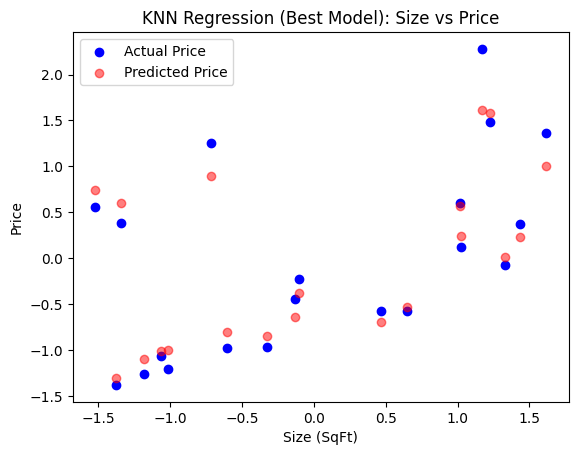

In [18]:
knn_regressor(non_linear,'Non_Linear')

<h2 style="color: #4CAF50; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Decision Tree Regressor
</h2>


In [19]:
def decision_tree_regressor(df, data):
    linear1 = pre_processing(df)
    X = linear1.drop('Price',axis=1)
    y = linear1['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeRegressor(random_state=42)

    param_grid = {
        'max_depth': [3, 5, 10, None],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5,verbose=1,n_jobs=5)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    # Evaluate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Best Decision Tree Model MSE on {data} Dataset: {mse:.2f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print (f'Train Accuracy - : {best_model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {best_model.score(X_test,y_test):.3f}')
    # Plotting the predictions
    plt.scatter(X_test['Size_SqFt'], y_test, color='blue', label='Actual Price')
    plt.scatter(X_test['Size_SqFt'], y_pred, color='red', label='Predicted Price', alpha=0.5)
    plt.xlabel('Size (SqFt)')
    plt.ylabel('Price')
    plt.title(f'Decision Tree Regression (Best Model): Size vs Price')
    plt.legend()
    plt.show()


<h2 style="color: #673AB7; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Decision Tree Regressor  On linear dataset
</h2>


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree Model MSE on Linear Dataset: 0.01
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Train Accuracy - : 0.999
Test Accuracy - : 0.994


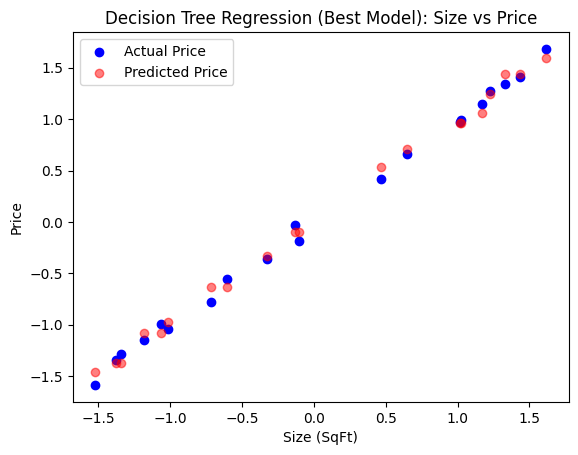

In [20]:
decision_tree_regressor(linear,"Linear")


<h2 style="color: #E91E63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Decision Tree Regressor  On non-linear dataset
</h2>


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree Model MSE on non_linear Dataset: 0.03
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy - : 1.000
Test Accuracy - : 0.971


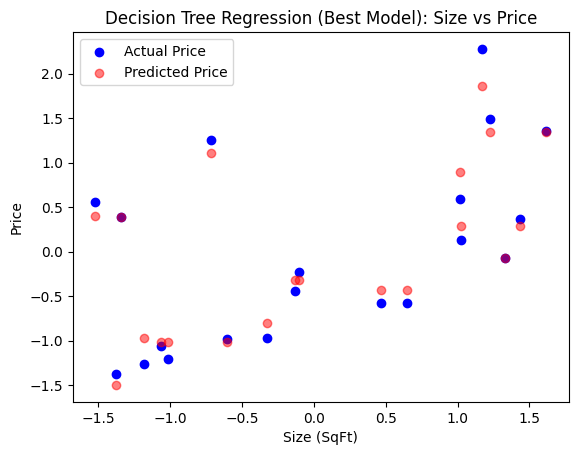

In [21]:
decision_tree_regressor(non_linear,'non_linear')

<h1 style="color: #E99F63; font-family: Arial, sans-serif; font-weight: bold; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">
    Analysis Report
</h1>


<table style="width: 100%; border-collapse: collapse;">
    <thead>
        <tr>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Algorithm</th>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Dataset Type</th>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Mean Squared Error (MSE)</th>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Train Accuracy</th>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Test Accuracy</th>
            <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Best Parameters</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Linear Regression</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.00</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.999</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.999</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">N/A</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;"></td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Non-Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.04</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.959</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.965</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">N/A</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">K-Nearest Neighbors</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.04</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">1.000</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.961</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;"></td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Non-Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.05</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">1.000</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.950</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Decision Tree</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.01</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.999</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.995</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;"></td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Non-Linear</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.03</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">1.000</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">0.0.971</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}</td>
        </tr>
    </tbody>
</table>



<p><strong>Linear Regression:</strong> This algorithm performs exceptionally well on linear datasets, achieving near-perfect accuracy with a Mean Squared Error (MSE) of 0.00. However, when applied to non-linear data, its performance drops significantly, with a higher MSE of 0.04 and reduced accuracy. This shows that Linear Regression is best suited for problems with linear relationships.</p>

 <p><strong>K-Nearest Neighbors (KNN):</strong> KNN proves to be flexible and reliable, performing consistently well on both linear and non-linear datasets. For linear data, it achieves a MSE of 0.04, with near-perfect accuracy, and for non-linear data, it's MSE is 0.05 with only a slight drop in test accuracy. This consistency highlights KNN's adaptability to different types of data distributions.</p>

<p><strong>Decision Trees:</strong> Decision Trees perform well on both linear and non-linear datasets, though they show slightly higher accuracy on linear data. On the linear dataset, they achieve a very low Mean Squared Error (MSE) of 0.01, with train accuracy of 0.999 and test accuracy of 0.995, making them a solid choice for structured data. For non-linear data, the MSE is slightly higher at 0.03, with train accuracy of 1.000 and test accuracy of 0.971, indicating good performance.</p>
